# The Korendijk pumping test

IHE, Transient groundwater

Olsthoorn, 2019-01-03

The most  famous book on pumping test analyses is due to Krusemand and De Ridder (1970, 1994). Their book contains all known solutions suitable for the analyses of pumping tests on groundwater wells and some examples with data.

The Korendijk pumping test, held in the Netherlands, is a test in a confined or unconfined setting, which should yield a value for the aquifers' transmissivity and its storage coefficient.

The situation in cross section is hier (taken from Kruzeman and De Ridder (1994).

![Korendijk](Korendijk_situation.png)

Theis considered the transient flow due to a well with a constant extraction since $t=0$ placed in a uniform confined aquifer of infinite extent.

The test can be interpreted from the Theis or the Hantush point of view, i.e. without or with leakage from a layer with fixed head. Which of the two may be deduced from the data: will they fit onto the Theis type curve or, when not, do they match with one of the Hantush type curves. Other effects may also influence the data, like partial penetration of the screen in the aquifer, storage inside the well and delayed yield and, notably, any effects caused by non-linearity, such as non-constant aquifer thickness under the influence of the drawdown in water table aquifers. All such effects may play their role under various circumstances, but may initially be ignored, to be included only when the data show that it is necessary.

The data for the pumping test are in a small text file  ["Korendijk_data.txt"](./Korendijk_data.txt), which we'll open and read into this notebook shortly.

We will interpret the test using the Theis solution for flow to a single well with fully penetrating screen in a uniorm aquifer of infinite extent having as yet unknown transmissivity $kD$ and storage coefficient $S$.

$$ s(r, t) = \frac Q {4 \pi kD} W(u),\,\,\,\, u = \frac {r^2 S} {4 kD t}$$

The well function lives in module `scipy.special` as `exp1`.

We may also use the approxmation of this solution, which is valid for long enough times and or small enough distances from the well:

$$ s(r, t) \approx \frac {Q} {4 \pi kD} \ln \left( \frac {2.25 kD t} {r^2 S} \right) $$

In [12]:
from scipy.special import exp1
import numpy as np
import matplotlib.pyplot as plt

## Read the data

In [48]:
fname = './Korendijk_data.txt'

with open(fname, 'r') as f:
    data = f.readlines() # read the data as a list of strings
    
hdr = data[0].split() # get the first line, i.e. the header
data = data[1:] # remove the header line from the data

In [49]:
# split each line (string) into its individual tokens
# each token is still a string not yet a number
toklist = [d.split() for d in data]

# convert this list of lines with string tokens into a list of lists with numbers
data = [] # start empty
for line in toklist:
    data.append([float(d) for d in line]) # convert this line

# when done, convert this list of lists of numbers into a numpy array    
data = np.array(data)
#data # show what we've got

In [52]:
# get the piezometer distances from the first data column, the unique values
distances = np.unique(data[:,0])

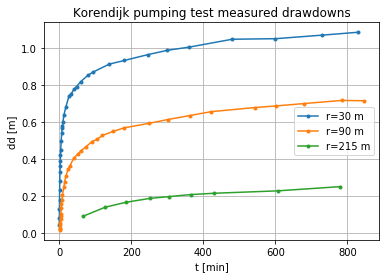

In [61]:
plt.title('Korendijk pumping test measured drawdowns')
plt.xlabel('t [min]')
plt.ylabel('dd [m]')
plt.grid()

for r in distances:
    I = data[:,0] == r # boolean array telling which data belong to this observation well
    plt.plot(data[I, -2], data[I,-1], '.-', label='r={:.0f} m'.format(r))
plt.legend()
plt.show()

## Same, but using log scale

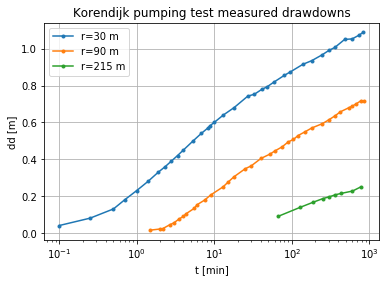

In [62]:
plt.title('Korendijk pumping test measured drawdowns')
plt.xlabel('t [min]')
plt.ylabel('dd [m]')
plt.xscale('log')
plt.grid()

for r in distances:
    I = data[:,0] == r
    plt.plot(data[I,-2], data[I,-1], '.-', label='r={:.0f} m'.format(r))
plt.legend()
plt.show()

## Drawdown on double log scale

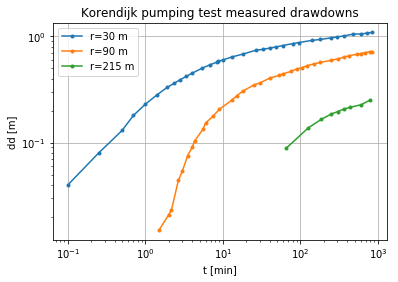

In [63]:
plt.title('Korendijk pumping test measured drawdowns')
plt.xlabel('t [min]')
plt.ylabel('dd [m]')
plt.xscale('log')
plt.yscale('log')
plt.grid()

for r in distances:
    I = data[:,0] == r
    plt.plot(data[I,-2], data[I,-1], '.-', label='r={:.0f} m'.format(r))
plt.legend()
plt.show()

## Drawdown on double log scale using $t/r^2$ on x-axis

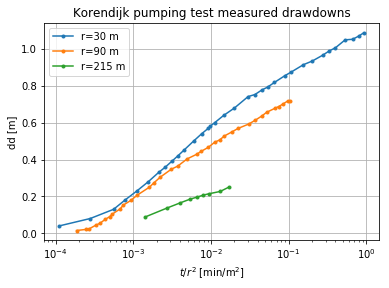

In [65]:
plt.title('Korendijk pumping test measured drawdowns')
plt.xlabel('$t/r^2$ [min/m$^2$]')
plt.ylabel('dd [m]')
plt.xscale('log')
#plt.yscale('log')
plt.grid()

for r in distances:
    I = data[:,0] == r
    tr2 = data[I, -2] / r**2
    plt.plot(tr2, data[I,-1], '.-', label='r={:.0f} m'.format(r))
plt.legend()
plt.show()

## Interpretation using the approximation of the Theis solution

$$ s = \frac {Q} {4 \pi kD} \ln \left( \frac {2.25 kD t} {r^2 S} \right) $$

or

$$ s = \frac {2.3 Q} {4 \pi kD} \log \left( \frac {2.25 kD t} {r^2 S} \right) $$

First determine the drawdown per log cyclus from the graph $\approx (1.1 - 0.21) / 3 \approx 0.30 $ 

$$ \Delta s = s_{10t} - s_t = 0.30 = \frac {2.3 Q} {4 \pi kD} $$

Notice that it doesn't matter in what dimension time is, at it drops out of the drawdown at $10t$ is compared with that at $t$.

Therefore, with Q = 788 m$^3$/d, we get

In [83]:
Q = 788 # m3/d
ds = (1.1 - 0.21) / 2 # drawdown increase per log cycle of time
kD = 2.3 * Q / (4 * np.pi * ds)
print('kD = {:.0f} m2/d'.format(kD))

kD = 324 m2/d


For the storage coefficient determine the intersection with the straight line with the line of zero drawdown. This is $t/r^2 = 2 \times 10 ^{-4}$ min. We have to convert to days to get answer consistent with the transmissivity.

Then setting the argument of the solution equal to 1 so that the computed drawdown is 0 and using the already obtained transmissivity yields the storage coefficient.

In [81]:
tr2 = 2e-4 / (24 * 60) # d/m2
r = distances[0]
S = 2.25 * kD * tr2
print('S = {:.2e} [-]'.format(S))

S = 1.01e-04 [-]


Clearly, the result depends somewhat on the exact straigt line drawn through the bundel of curves for the observation wells. In the ideal situation, these curves fall onto each other. In this real-world case this is not true, which is due to non-uniformity of the real-world aquifer. There are many real-world pumping test where the match is mucht closer. But it is good to keep in mind that the real world is less homogeneous than the analytic solution presumes.

## Interpretation using the match on double log scales (Classical method)

The classical interpreation plots the measured drawdowns on double log paper (drawdown $s$ versus $t/r^2$ and compares them with the Theis type curve $W(u)$ versus $1/u$ also drawn on double log paper. Because $1/u = (4 kD t) / (r^2 S)$ it follows that on logarthmic scales $1/u$ and $t/r^2$ differ only by a constant factor, which represents a horizontal shift on the log scale. The drawdown $s$ only differs the constant $Q/(4 \pi kD$ from the well function $W(u)$, and so  this implies a vertical shift on logarithmic scale. Hence the measured drawdown versus $t/r^2$ on double log scale looks exactly the same as the theis type curve but it is only shifted a given distance along the horizontal axis and a given distance along the vertical axis. These two shifts yield the sought transmissivity and storage coefficient.

Below we draw the Theis type curve and the drawdown $s$ multiplied by a factor $A$ and the $t/r^2$ multiplied by a factor $B$, choosing $A$ and $B$ interactively untill the measured and the type curve match best.

In this worked out example, I already optmized the values of $A$ and $B$ by hand. Set them both to 1 and try optimizing them yourself.

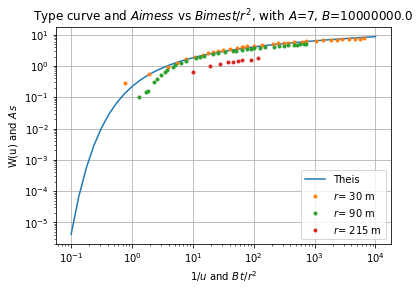

In [129]:
A = 7
B = 1.0e7
u = np.logspace(-4, 1, 41)
plt.title('Type curve and $A \times s$ vs $B \times t/r^2$, with $A$={}, $B$={}'.format(A, B))
plt.xlabel('$1/u$ and $B \, t/r^2$')
plt.ylabel('W(u) and $A \, s$')
plt.xscale('log')
plt.yscale('log')
plt.grid()

# the Theis type curve
plt.plot(1/u, exp1(u), label='Theis')

# The measurements
for r in distances :
    I = data[:,0] == r
    t = data[I,-2] / (24 * 60)
    s = data[I,-1] # Q /(4 * np.pi * kD) * exp1(r**2 * S / (4 * kD * t))
    plt.plot(B * t/r**2, A * s, '.', label='$r$= {:.3g} m'.format(r))
    
plt.legend()
plt.show()
            

So $A s = W(u)$ and $s = \frac Q {2 \pi kD} W(u)$ and, therefore $A = \frac {4 \pi kD} {Q}$ and $ kD = \frac {A Q} {4 \pi}$

In [130]:
kD = A * Q /4 /np.pi
print('kD = {:.0f} m2/d'.format(kD))

kD = 439 m2/d


The storage coefficient then follows from

$\frac 1 u = B \frac t {r^2}$, that is, $\frac {4 kD t} {r^2 S} = B \frac t {r^2}$ so that $S = \frac {4 kD} B$

In [131]:
S = 4 * kD / B
print('S = {:.2e} [-]'.format(S))

S = 1.76e-04 [-]


As one sees, the results obtained this way are consistent with those obtained by the previous method.

## Directly optmizing $kD$ and $S$ instead of  $A$ and $B$

The previous method was inspired by the shifting of the measurements drawn on double log paper over the Theis type curve also drawn on double log paper. However, because we now have a computer, we could just as well directly optimize $kD$ and $S$ by trial and error to find the best match between type curve and measurements.

It may then be most convenient to let the type curve as it is and compute $W(u) = \frac s {Q/(4 \pi kD)}$  and $\frac 1 u = \frac {4 kD t} {r^2 S}$

This is done next.

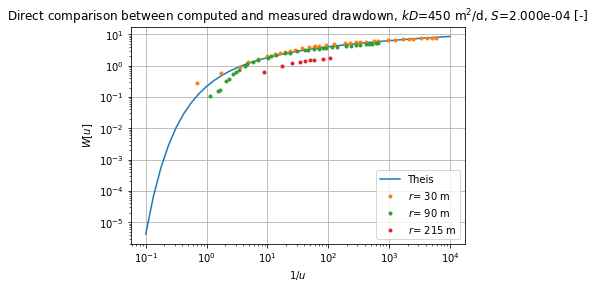

In [132]:
kD = 450
S = 0.0002
u = np.logspace(-4, 1, 41)
plt.title('Direct comparison between computed and measured drawdown, $kD$={:.0f} m$^2$/d, $S$={:.3e} [-]'.format(kD,S))
plt.xlabel('$1/u$')
plt.ylabel('$W[u]$')
plt.xscale('log')
plt.yscale('log')
plt.grid()

# the Theis type curve
plt.plot(1/u, exp1(u), label='Theis')

# The measurements
for r in distances :
    I = data[:,0] == r
    t = data[I,-2] / (24 * 60)
    s = data[I,-1]
    plt.plot(4 * kD * t/(S * r**2), s / (Q/(4 * np.pi * kD)), '.', label='$r$= {:.3g} m'.format(r))
    
plt.legend()
plt.show()
            

# Modern methods

We now obtimized the two factors A and B by hand. This was relatively straight-forward for this case in which only two parameters were involved. However in more complicated cases, finding the optimum parameter combination by trial and error takes much more effort, and often times is veritually impossible. Therefore, the modern way is to let the computer find the optimum combination of parmeters, which minimizes the difference between the type curve (or the model) and the measurements.

## Conclusion

This notebook shows how an analysis of a pumping test can be done by first exploring the data and then applying several methods to see what works. If only the final answer is of interest, then copy that result to another document or notebook to continue working with that results. However, this current notebook is and will always remain a good reference as it is completely documented and clearly shows all the steps taken to explore the problem and to find one or more suitable answers.

## Bibliography

Kruzeman, G.P and N.A. de Ridder (1970) Analysis and evaluation of pumping test data. ILRI, Bulletin 11. 200pp.

Note that the more extended version of this book is available for free on the internet and dates of 1994/95